In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [10]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [12]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [14]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [16]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

/var/folders/f2/01t6cgs523d0hygfn8krf_fw0000gn/T/ipykernel_6475/1153422603.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="Set2", ax=axes[0,0])
/var/folders/f2/01t6cgs523d0hygfn8krf_fw0000gn/T/ipykernel_6475/1153422603.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1,1].legend()
/var/folders/f2/01t6cgs523d0hygfn8krf_fw0000gn/T/ipykernel_6475/1153422603.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="Set3", ax=axes[1,2])
/var/folders/f2/01t6cgs523d0hygfn8krf_fw0000gn/T

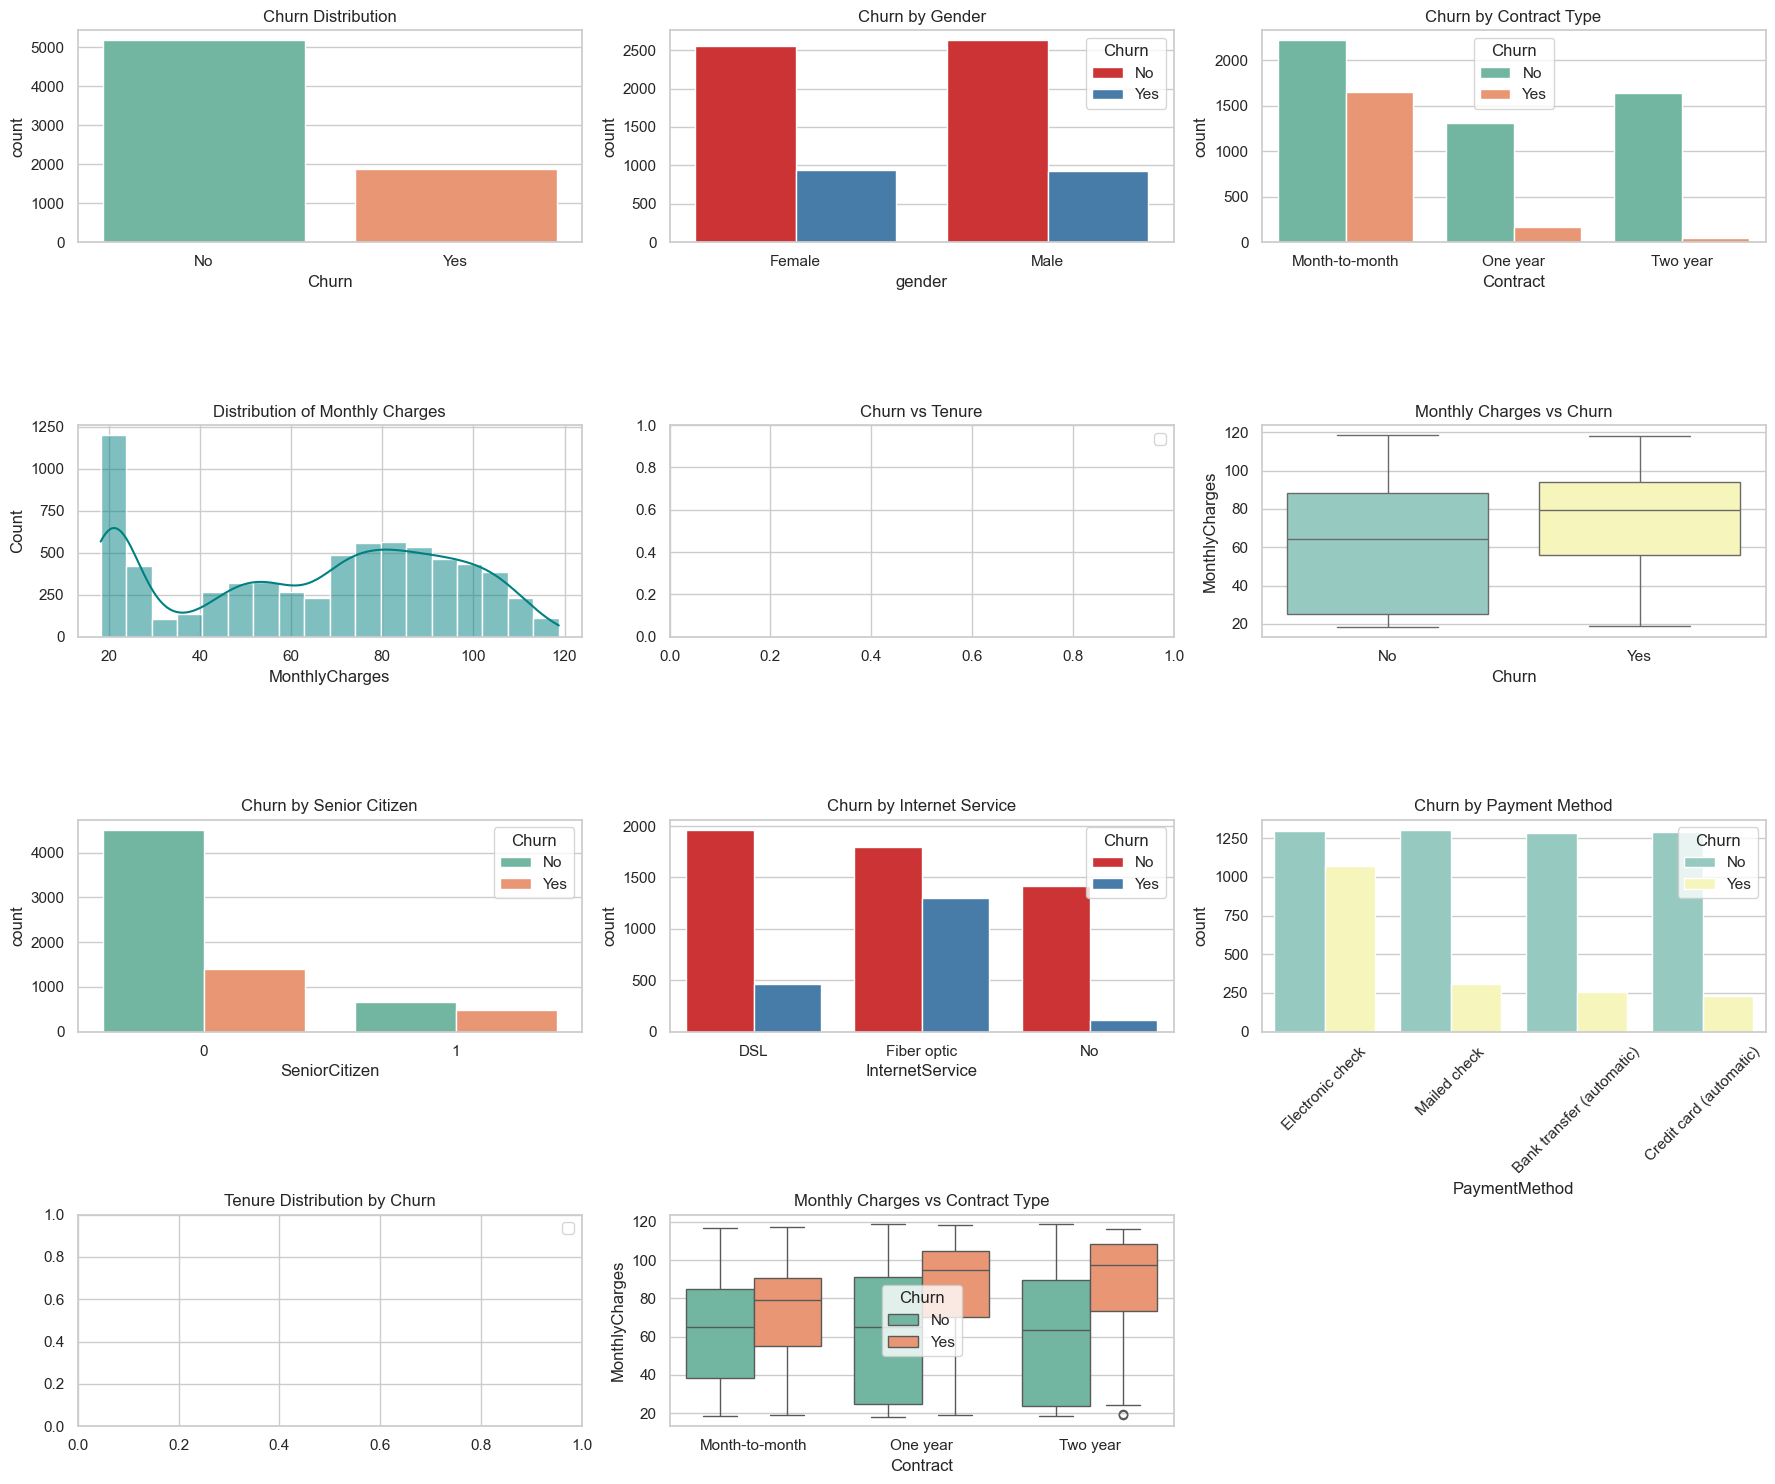

In [18]:
sns.set(style="whitegrid", palette="pastel")

fig, axes = plt.subplots(4, 3, figsize=(18, 15)) 

# 1. Target Variable Distribution
sns.countplot(x="Churn", data=df, palette="Set2", ax=axes[0,0])
axes[0,0].set_title("Churn Distribution")

# 2. Churn by Gender
sns.countplot(x="gender", hue="Churn", data=df, palette="Set1", ax=axes[0,1])
axes[0,1].set_title("Churn by Gender")

# 3. Churn by Contract Type
sns.countplot(x="Contract", hue="Churn", data=df, palette="Set2", ax=axes[0,2])
axes[0,2].set_title("Churn by Contract Type")

# 4. Distribution of Monthly Charges
sns.histplot(df["MonthlyCharges"], kde=True, color="teal", ax=axes[1,0])
axes[1,0].set_title("Distribution of Monthly Charges")

# 5. Churn vs Tenure
sns.histplot(df[df["Churn"]==1]["tenure"], kde=True, color="red", ax=axes[1,1], label="Churned")
sns.histplot(df[df["Churn"]==0]["tenure"], kde=True, color="green", ax=axes[1,1], label="Stayed")
axes[1,1].legend()
axes[1,1].set_title("Churn vs Tenure")

# 6. Boxplot: Monthly Charges vs Churn
sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="Set3", ax=axes[1,2])
axes[1,2].set_title("Monthly Charges vs Churn")

# 7. Churn by Senior Citizen
sns.countplot(x="SeniorCitizen", hue="Churn", data=df, palette="Set2", ax=axes[2,0])
axes[2,0].set_title("Churn by Senior Citizen")

# 8. Churn by Internet Service
sns.countplot(x="InternetService", hue="Churn", data=df, palette="Set1", ax=axes[2,1])
axes[2,1].set_title("Churn by Internet Service")

# 9. Churn by Payment Method
sns.countplot(x="PaymentMethod", hue="Churn", data=df, palette="Set3", ax=axes[2,2])
axes[2,2].set_title("Churn by Payment Method")
axes[2,2].tick_params(axis="x", rotation=45)

# 10. Tenure Distribution by Churn (KDE)
sns.kdeplot(df[df["Churn"]==1]["tenure"], fill=True, color="red", ax=axes[3,0], label="Churned")
sns.kdeplot(df[df["Churn"]==0]["tenure"], fill=True, color="green", ax=axes[3,0], label="Stayed")
axes[3,0].set_title("Tenure Distribution by Churn")
axes[3,0].legend()

# 11. Monthly Charges by Contract Type
sns.boxplot(x="Contract", y="MonthlyCharges", hue="Churn", data=df, palette="Set2", ax=axes[3,1])
axes[3,1].set_title("Monthly Charges vs Contract Type")

# 12. Leave axes[3,2] empty or use for something else
axes[3,2].axis("off")  # blank cell

plt.tight_layout()
plt.show()


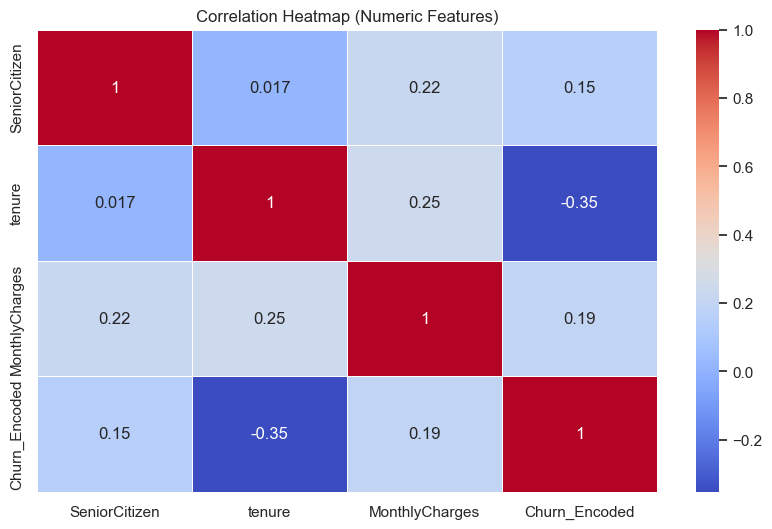

In [24]:
# === 1. Correlation Heatmap (numeric features only) ===
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()



/var/folders/f2/01t6cgs523d0hygfn8krf_fw0000gn/T/ipykernel_6475/2472203694.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="Set2")
/var/folders/f2/01t6cgs523d0hygfn8krf_fw0000gn/T/ipykernel_6475/2472203694.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="Set2")
/var/folders/f2/01t6cgs523d0hygfn8krf_fw0000gn/T/ipykernel_6475/2472203694.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette=

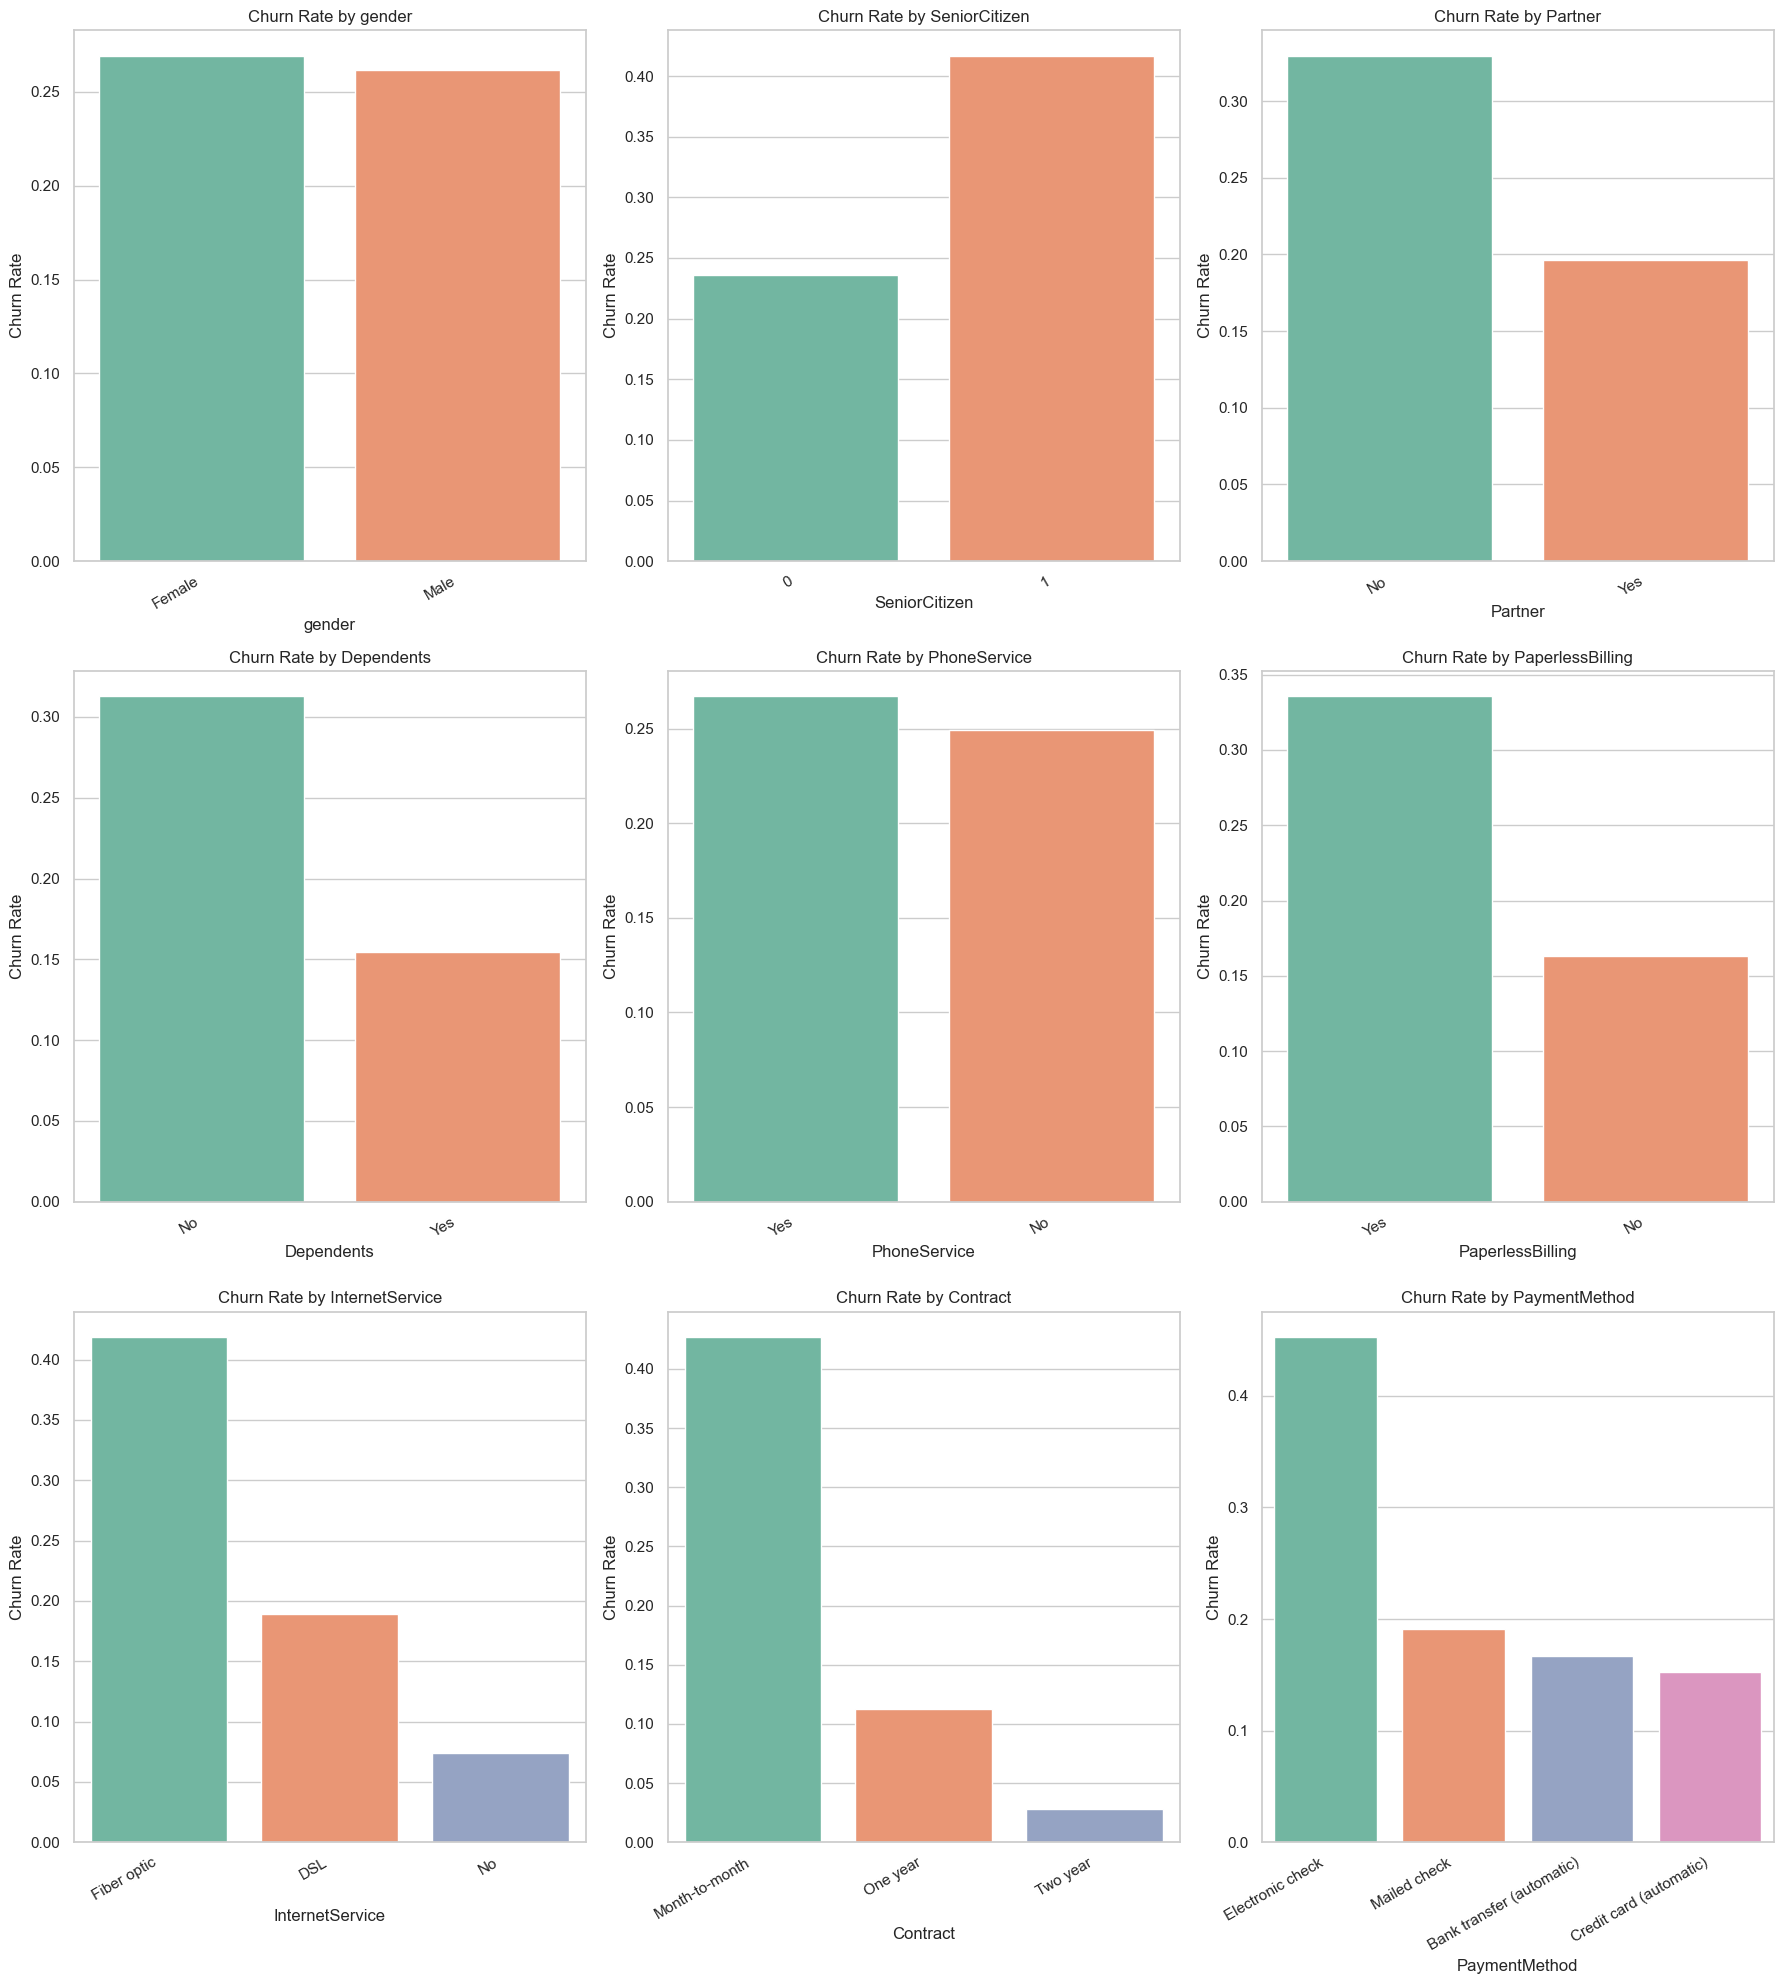

In [26]:
df["Churn_Encoded"] = df["Churn"].map({"No": 0, "Yes": 1})

sns.set(style="whitegrid", palette="pastel")

cat_cols = ["gender","SeniorCitizen","Partner","Dependents","PhoneService",
            "PaperlessBilling","InternetService","Contract","PaymentMethod"]

plt.figure(figsize=(18, 20))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    churn_rate = df.groupby(col)["Churn_Encoded"].mean().sort_values(ascending=False)
    
    sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="Set2")
    plt.title(f"Churn Rate by {col}")
    plt.ylabel("Churn Rate")
    plt.xticks(rotation=30, ha="right")

plt.tight_layout()
plt.show()


In [38]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Encoded
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [32]:
if "customerID" in df.columns:
    df = df.drop("customerID", axis=1)

In [42]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"] = df["TotalCharges"].fillna(0)

# 3. Select categorical columns (object or bool)
cat_cols = df.select_dtypes(include=["object", "bool"]).columns

# Drop churn itself (already encoded)
cat_cols = [col for col in cat_cols if col not in ["customerID", "Churn"]]

# 4. One-hot encode only categorical features
df_encode = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [44]:
df_encode.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Churn_Encoded,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,No,0,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,No,0,True,False,False,True,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,Yes,1,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,No,0,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,Yes,1,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
df_encode[num_cols] = scaler.fit_transform(df_encode[num_cols])


In [62]:
from sklearn.model_selection import train_test_split

X = df_encode.drop(columns=["Churn","Churn_Encoded"])  
y = df_encode["Churn_Encoded"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [64]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [66]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8062455642299503

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409


Confusion Matrix:
 [[927 108]
 [165 209]]


In [68]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, 
                                  random_state=42, 
                                  class_weight="balanced")  

rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.7877927608232789

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409


Confusion Matrix:
 [[928 107]
 [192 182]]


In [72]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [74]:
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: Churn_Encoded
0    4139
1    1495
Name: count, dtype: int64
After SMOTE: Churn_Encoded
0    4139
1    4139
Name: count, dtype: int64


In [76]:
rf_model_smote = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model_smote.fit(X_train_res, y_train_res)

# Predictions on original test set
y_pred_smote = rf_model_smote.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))

Accuracy: 0.759403832505323

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      1035
           1       0.54      0.63      0.58       374

    accuracy                           0.76      1409
   macro avg       0.70      0.72      0.71      1409
weighted avg       0.77      0.76      0.77      1409


Confusion Matrix:
 [[833 202]
 [137 237]]


In [86]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5]
}

# Initialize XGBoost classifier (clean, no use_label_encoder)
xgb_model = xgb.XGBClassifier(
    random_state=42,
    eval_metric='logloss',  # avoids label encoder warning
    verbosity=0             # suppress logs if needed
)

# Randomized Search CV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,          # number of random combinations
    scoring='f1',       # focus on churn class performance
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit on SMOTE-resampled training data
random_search.fit(X_train_res, y_train_res)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Evaluate the tuned model
best_xgb = random_search.best_estimator_
y_pred_tuned = best_xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': 0.6, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.8}
Accuracy: 0.7643718949609652

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.83      1035
           1       0.55      0.67      0.60       374

    accuracy                           0.76      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.78      0.76      0.77      1409


Confusion Matrix:
 [[825 210]
 [122 252]]


In [88]:
y_probs = best_xgb.predict_proba(X_test)[:, 1]

# Choose a lower threshold, e.g., 0.4
threshold = 0.4
y_pred_threshold = np.where(y_probs >= threshold, 1, 0)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_threshold))
print("\nClassification Report:\n", classification_report(y_test, y_pred_threshold))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_threshold))

Accuracy: 0.7437899219304471

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.74      0.81      1035
           1       0.51      0.75      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.79      0.74      0.76      1409


Confusion Matrix:
 [[769 266]
 [ 95 279]]


<Figure size 1200x800 with 0 Axes>

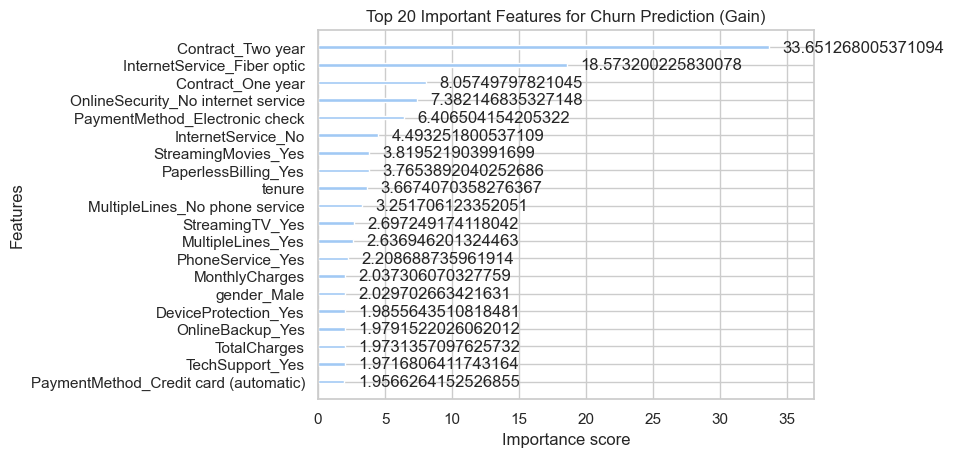

In [90]:
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(12,8))
plot_importance(best_xgb, max_num_features=20, importance_type='gain', show_values=True)
plt.title("Top 20 Important Features for Churn Prediction (Gain)")
plt.show()

In [92]:
import joblib
joblib.dump(best_xgb, "xgb_churn_model.pkl")

['xgb_churn_model.pkl']